In [1]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels as sm
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, roc_curve, auc, roc_auc_score
from sklearn.model_selection import learning_curve

pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', '{:,.3f}'.format)

import sys
sys.path.append("../src")
import process_data as process

In [2]:
df = process.load_data('../data/raw/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,"61,833.900",256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,"68,441.850",193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,"59,785.940",236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,"54,806.180",245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,"73,889.990",225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
X_features = ['Age', 'Area Income'] #, 'Daily Internet Usage'] #, 'Male']
X = df[X_features]
y = df['Clicked on Ad']

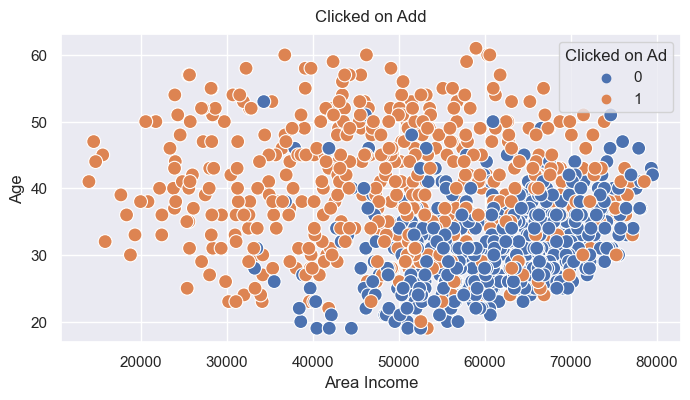

In [4]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Area Income', y='Age', hue='Clicked on Ad', data=df, s=100)
plt.title("Clicked on Add", y=1.015)
plt.ylabel("Age")
ax = plt.gca()

In [5]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [6]:
clf_model = SGDClassifier(loss='log_loss', penalty='l2')
clf_model.fit(X_norm, y)

print(f"number of iterations completed: {clf_model.n_iter_}, number of weight updates: {clf_model.t_}")

b_norm = clf_model.intercept_
w_norm = clf_model.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

y_pred = clf_model.predict(X_norm)
print('Output of the 1st 4 predicted value:', y_pred[0:4])

number of iterations completed: 33, number of weight updates: 33001.0
model parameters:                   w: [[ 1.32459801 -1.78357848]], b:[0.87395752]
Output of the 1st 4 predicted value: [0 0 0 0]


In [7]:
print('Multiple Logistic Regression parameters using SGDClassifier:')
print('\tThe R-square: {:.3f}'.format(clf_model.score(X_norm, y)))
print('\tOutput of the 1st 4 predicted value:', y_pred[0:4])
mse = mean_squared_error(y, y_pred)
print('\tMean square error of actual & predicted order value: {:.3f}'.format(mse))
print("")

Multiple Logistic Regression parameters using SGDClassifier:
	The R-square: 0.802
	Output of the 1st 4 predicted value: [0 0 0 0]
	Mean square error of actual & predicted order value: 0.198



In [9]:
lr_model = LogisticRegression()
lr_model.fit(X_norm, y)

print(f"number of iterations completed: {lr_model.n_iter_}")

b_norm = lr_model.intercept_
w_norm = lr_model.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

y_pred = lr_model.predict(X_norm)

number of iterations completed: [8]
model parameters:                   w: [[ 1.40615098 -1.36345574]], b:[0.25899624]


In [10]:
print('Multiple Logistic Regression parameters using LogisticRegression:')
print('\tThe R-square: {:.3f}'.format(lr_model.score(X_norm, y)))
print('\tOutput of the 1st 4 predicted value:', y_pred[0:4])
mse = mean_squared_error(y, y_pred)
print('\tMean square error of actual & predicted order value: {:.3f}'.format(mse))
print("")

Multiple Logistic Regression parameters using LogisticRegression:
	The R-square: 0.809
	Output of the 1st 4 predicted value: [0 0 0 0]
	Mean square error of actual & predicted order value: 0.191



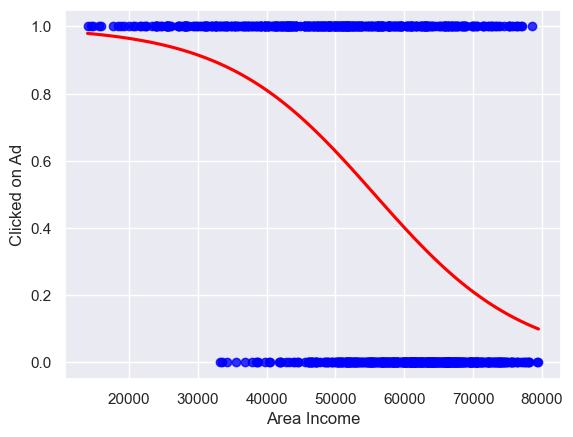

In [11]:
# plot logistic regression curve with black points and red line
sns.regplot(x=df['Area Income'], y=df['Clicked on Ad'], data=df, logistic=True, ci=None,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

0.87368

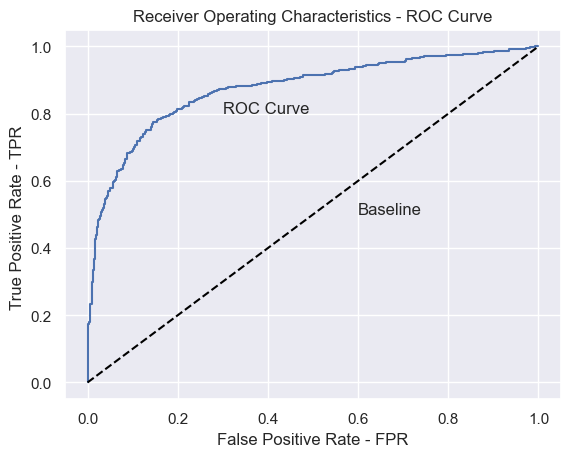

In [12]:
probabilities = lr_model.predict_proba(X_norm)[:,1]
fpr, tpr, thresholds = roc_curve(y, probabilities)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color="black",linestyle="--")
 
plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.8,"ROC Curve")
 
roc_auc_score(y, probabilities)

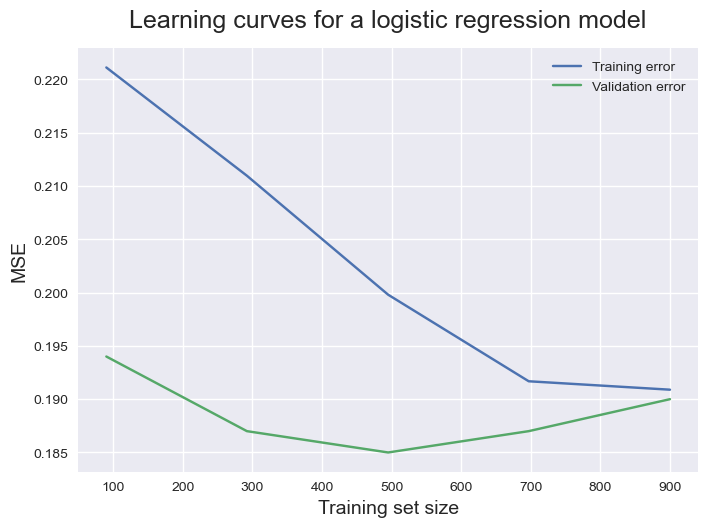

In [20]:
# train_sizes = [1, 200, 400, 600, 800]
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(),
                                                              X = X_norm, y = y, #train_sizes = train_sizes,
                                                              cv = 10, scoring = 'neg_mean_squared_error', shuffle=True)

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error') 
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression model', fontsize = 18, y = 1.03)
plt.legend(); plt.show()